# Ajinkya Deshmukh

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore
import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# PreProcessing

In [2]:
fifa=pd.read_csv('fifa.csv')

In [3]:
fifa.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
fifa.tail()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,https://cdn.sofifa.org/teams/2/light/703.png,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,https://cdn.sofifa.org/teams/2/light/1944.png,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,https://cdn.sofifa.org/teams/2/light/15048.png,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K
18206,246269,G. Nugent,16,https://cdn.sofifa.org/players/4/19/246269.png,England,https://cdn.sofifa.org/flags/14.png,46,66,Tranmere Rovers,https://cdn.sofifa.org/teams/2/light/15048.png,...,43.0,40.0,43.0,50.0,10.0,15.0,9.0,12.0,9.0,€165K


In [5]:
fifa.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

In [6]:
fifavi=pd.read_csv('fifa_ variable_information.csv')

In [7]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null object
Body Type                   18159 non-null

In [8]:
def basic_details(df):
    b = pd.DataFrame()
    b['Missing value'] = df.isnull().sum()
    b['N unique value'] = df.nunique()
    b['dtype'] = df.dtypes
    return b
basic_details(fifa)

,Missing value,N unique value,dtype
ID,0,18207,int64
Name,0,17194,object
Age,0,29,int64
Photo,0,18207,object
Nationality,0,164,object
Flag,0,164,object
Overall,0,48,int64
Potential,0,47,int64
Club,241,651,object
Club Logo,0,679,object


# Deleting Columns

In [9]:
fifa_copy=fifa.copy()

In [10]:
del fifa_copy['Photo']
del fifa_copy['Flag']
del fifa_copy['Club Logo']
del fifa_copy['Jersey Number']
del fifa_copy['Loaned From']
del fifa_copy['Club']
del fifa_copy['Body Type']

In [11]:
fifa_copy

,ID,Name,Age,Nationality,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,€110.5M,€565K,Left,5.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,€77M,€405K,Right,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,€118.5M,€290K,Right,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,€72M,€260K,Right,4.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,€102M,€355K,Right,4.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,183277,E. Hazard,27,Belgium,91,91,€93M,€340K,Right,4.0,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,177003,L. Modrić,32,Croatia,91,91,€67M,€420K,Right,4.0,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,176580,L. Suárez,31,Uruguay,91,91,€80M,€455K,Right,5.0,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,155862,Sergio Ramos,32,Spain,91,91,€51M,€380K,Right,4.0,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,200389,J. Oblak,25,Slovenia,90,93,€68M,€94K,Right,3.0,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


In [12]:
fifa_copy.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Value',
       'Wage', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Position', 'Joined',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

In [13]:
bdun=basic_details(fifa_copy)

In [14]:
export_excel1=bdun.to_excel (r'C:\Users\Ajinkya\Desktop\DSE\Mini Project\EDA_Mini_Project\basicdetailsuntreated.xlsx')

# Treating Data Types

In [15]:
datatype = fifa_copy.dtypes[fifa_copy.dtypes == "object"]
datatype

Name                    object
Nationality             object
Value                   object
Wage                    object
Preferred Foot          object
Work Rate               object
Position                object
Joined                  object
Contract Valid Until    object
Height                  object
Weight                  object
Release Clause          object
dtype: object

In [16]:
fifa_copy[['Name','Nationality','Value','Wage','Preferred Foot','Work Rate','Position','Joined','Contract Valid Until','Height','Weight','Release Clause']]

,Name,Nationality,Value,Wage,Preferred Foot,Work Rate,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,L. Messi,Argentina,€110.5M,€565K,Left,Medium/ Medium,RF,"Jul 1, 2004",2021,5'7,159lbs,€226.5M
1,Cristiano Ronaldo,Portugal,€77M,€405K,Right,High/ Low,ST,"Jul 10, 2018",2022,6'2,183lbs,€127.1M
2,Neymar Jr,Brazil,€118.5M,€290K,Right,High/ Medium,LW,"Aug 3, 2017",2022,5'9,150lbs,€228.1M
3,De Gea,Spain,€72M,€260K,Right,Medium/ Medium,GK,"Jul 1, 2011",2020,6'4,168lbs,€138.6M
4,K. De Bruyne,Belgium,€102M,€355K,Right,High/ High,RCM,"Aug 30, 2015",2023,5'11,154lbs,€196.4M
5,E. Hazard,Belgium,€93M,€340K,Right,High/ Medium,LF,"Jul 1, 2012",2020,5'8,163lbs,€172.1M
6,L. Modrić,Croatia,€67M,€420K,Right,High/ High,RCM,"Aug 1, 2012",2020,5'8,146lbs,€137.4M
7,L. Suárez,Uruguay,€80M,€455K,Right,High/ Medium,RS,"Jul 11, 2014",2021,6'0,190lbs,€164M
8,Sergio Ramos,Spain,€51M,€380K,Right,High/ Medium,RCB,"Aug 1, 2005",2020,6'0,181lbs,€104.6M
9,J. Oblak,Slovenia,€68M,€94K,Right,Medium/ Medium,GK,"Jul 16, 2014",2021,6'2,192lbs,€144.5M


In [17]:
def height_to_int(df_height):
    try:
        x=str(df_height)
        feet=int(x[0])
        dlm=df_height[-2]
        
        if dlm == "'":
            height = round((feet * 12 + int(df_height[-1])) *2.54,0)
        elif dlm != "'":
            height = round((feet * 12 + int(df_height[-2:])) *2.54,0)
    except ValueError:
        height = 0
    return height
fifa_copy['Height'] = fifa_copy['Height'].fillna(method='ffill')
fifa_copy["Height"]=fifa_copy['Height'].apply(height_to_int)
fifa_copy['Height'] = fifa_copy['Height'].astype(float)

In [18]:
fifa_copy.Value = [x.strip().replace('€', '') for x in fifa_copy.Value]
fifa_copy.Wage = [x.strip().replace('€', '') for x in fifa_copy.Wage]
fifa_copy.Value = [x.strip().replace('.', '') for x in fifa_copy.Value]
fifa_copy.Wage = [x.strip().replace('.', '') for x in fifa_copy.Wage]
fifa_copy.Value = [x.strip().replace('M', '000000') for x in fifa_copy.Value]
fifa_copy.Value = [x.strip().replace('K', '000') for x in fifa_copy.Value]
fifa_copy.Wage = [x.strip().replace('M', '000000') for x in fifa_copy.Wage]
fifa_copy.Wage = [x.strip().replace('K', '000') for x in fifa_copy.Wage]

In [19]:
fifa_copy[["Value", "Wage"]]=fifa_copy[["Value", "Wage"]].astype(float)

In [20]:
fifa_copy['Joined'] = pd.to_datetime(fifa_copy['Joined'])
fifa_copy['Joined'] = fifa_copy['Joined'].dt.year
fifa_copy['Joined'] = fifa_copy['Joined'].fil lna(method='ffill')
fifa_copy['Joined'] = fifa_copy['Joined'].astype(int)

In [21]:
fifa_copy['Contract Valid Until'] = pd.to_datetime(fifa_copy['Contract Valid Until'])
fifa_copy['Contract Valid Until'] = fifa_copy['Contract Valid Until'].dt.year
fifa_copy['Contract Valid Until'] = fifa_copy['Contract Valid Until'].fillna(method='ffill')
fifa_copy['Contract Valid Until'] = fifa_copy['Contract Valid Until'].astype(int)

In [22]:
fifa_copy['Weight'] = fifa_copy['Weight'].fillna(method='ffill')
fifa_copy.Weight = [x.strip().replace('lbs', '') for x in fifa_copy.Weight]
fifa_copy['Weight'] = fifa_copy['Weight'].astype(float)

In [23]:
fifa_copy['Release Clause'] = fifa_copy['Release Clause'].fillna(method='ffill')
fifa_copy['Release Clause'] = [x.strip().replace('€', '') for x in fifa_copy['Release Clause']]
fifa_copy['Release Clause'] = [x.strip().replace('.', '') for x in fifa_copy['Release Clause']]
fifa_copy['Release Clause'] = [x.strip().replace('M', '000000') for x in fifa_copy['Release Clause']]
fifa_copy['Release Clause'] = [x.strip().replace('K', '000') for x in fifa_copy['Release Clause']]
fifa_copy['Release Clause'] = fifa_copy['Release Clause'].astype(float)

In [24]:
fifa_copy[['Name','Nationality','Value','Wage','Preferred Foot','Work Rate','Position','Joined','Contract Valid Until','Height','Weight','Release Clause']]

,Name,Nationality,Value,Wage,Preferred Foot,Work Rate,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,L. Messi,Argentina,1.105000e+09,565000.0,Left,Medium/ Medium,RF,2004,2021,170.0,159.0,2.265000e+09
1,Cristiano Ronaldo,Portugal,7.700000e+07,405000.0,Right,High/ Low,ST,2018,2022,188.0,183.0,1.271000e+09
2,Neymar Jr,Brazil,1.185000e+09,290000.0,Right,High/ Medium,LW,2017,2022,175.0,150.0,2.281000e+09
3,De Gea,Spain,7.200000e+07,260000.0,Right,Medium/ Medium,GK,2011,2020,193.0,168.0,1.386000e+09
4,K. De Bruyne,Belgium,1.020000e+08,355000.0,Right,High/ High,RCM,2015,2023,180.0,154.0,1.964000e+09
5,E. Hazard,Belgium,9.300000e+07,340000.0,Right,High/ Medium,LF,2012,2020,173.0,163.0,1.721000e+09
6,L. Modrić,Croatia,6.700000e+07,420000.0,Right,High/ High,RCM,2012,2020,173.0,146.0,1.374000e+09
7,L. Suárez,Uruguay,8.000000e+07,455000.0,Right,High/ Medium,RS,2014,2021,183.0,190.0,1.640000e+08
8,Sergio Ramos,Spain,5.100000e+07,380000.0,Right,High/ Medium,RCB,2005,2020,183.0,181.0,1.046000e+09
9,J. Oblak,Slovenia,6.800000e+07,94000.0,Right,Medium/ Medium,GK,2014,2021,188.0,192.0,1.445000e+09


In [25]:
fifa_copy=fifa_copy.rename(columns={"Value": "Value (€)", "Wage": "Wage (€)","Height":"Height (cms)","Weight":"Weight (lbs)","Release Clause":"ReleaseClause (€)"})

In [26]:
fifa_copy

,ID,Name,Age,Nationality,Overall,Potential,Value (€),Wage (€),Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause (€)
0,158023,L. Messi,31,Argentina,94,94,1.105000e+09,565000.0,Left,5.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,2.265000e+09
1,20801,Cristiano Ronaldo,33,Portugal,94,94,7.700000e+07,405000.0,Right,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,1.271000e+09
2,190871,Neymar Jr,26,Brazil,92,93,1.185000e+09,290000.0,Right,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,2.281000e+09
3,193080,De Gea,27,Spain,91,93,7.200000e+07,260000.0,Right,4.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,1.386000e+09
4,192985,K. De Bruyne,27,Belgium,91,92,1.020000e+08,355000.0,Right,4.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,1.964000e+09
5,183277,E. Hazard,27,Belgium,91,91,9.300000e+07,340000.0,Right,4.0,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,1.721000e+09
6,177003,L. Modrić,32,Croatia,91,91,6.700000e+07,420000.0,Right,4.0,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,1.374000e+09
7,176580,L. Suárez,31,Uruguay,91,91,8.000000e+07,455000.0,Right,5.0,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,1.640000e+08
8,155862,Sergio Ramos,32,Spain,91,91,5.100000e+07,380000.0,Right,4.0,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,1.046000e+09
9,200389,J. Oblak,25,Slovenia,90,93,6.800000e+07,94000.0,Right,3.0,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,1.445000e+09


In [27]:
export_excel2=fifa_copy.to_excel (r'C:\Users\Ajinkya\Desktop\DSE\Mini Project\EDA_Mini_Project\EDA_Mini_Project.xlsx')

# Treating Missing Values 

In [28]:
print(fifa_copy['Preferred Foot'].mode())
fifa_copy['Preferred Foot']=fifa_copy['Preferred Foot'].fillna(value='Right')
print(fifa_copy['Preferred Foot'].isnull().sum())

0    Right
dtype: object
0


In [29]:
print(fifa_copy['Work Rate'].mode())
fifa_copy['Work Rate']=fifa_copy['Work Rate'].fillna(value='Medium/ Medium')
print(fifa_copy['Work Rate'].isnull().sum())

0    Medium/ Medium
dtype: object
0


In [30]:
print(fifa_copy['Position'].mode())
fifa_copy['Position']=fifa_copy['Position'].fillna(value='ST')
print(fifa_copy['Position'].isnull().sum())

0    ST
dtype: object
0


In [31]:
fifa_copy['International Reputation']=fifa_copy['International Reputation'].fillna(value=fifa_copy['International Reputation'].mean())
print(fifa_copy['International Reputation'].isnull().sum())
fifa_copy['International Reputation'] = fifa_copy['International Reputation'].astype(float)

0


In [32]:
fifa_copy['International Reputation']=fifa_copy['International Reputation'].fillna(value=fifa_copy['International Reputation'].mean())
print(fifa_copy['International Reputation'].isnull().sum())
fifa_copy['International Reputation'] = fifa_copy['International Reputation'].astype(float)

0


In [33]:
fifa_copy['Weak Foot']=fifa_copy['Weak Foot'].fillna(value=fifa_copy['Weak Foot'].mean())
print(fifa_copy['Weak Foot'].isnull().sum())
fifa_copy['Weak Foot'] = fifa_copy['Weak Foot'].astype(float)

0


In [34]:
fifa_copy['Skill Moves']=fifa_copy['Skill Moves'].fillna(value=fifa_copy['Skill Moves'].mean())
print(fifa_copy['Skill Moves'].isnull().sum())
fifa_copy['Skill Moves'] = fifa_copy['Skill Moves'].astype(float)

0


In [35]:
fifa_copy['Crossing']=fifa_copy['Crossing'].fillna(value=fifa_copy['Crossing'].mean())
print(fifa_copy['Crossing'].isnull().sum())
fifa_copy['Crossing'] = fifa_copy['Crossing'].astype(float)

0


In [36]:
fifa_copy['Finishing']=fifa_copy['Finishing'].fillna(value=fifa_copy['Finishing'].mean())
print(fifa_copy['Finishing'].isnull().sum())
fifa_copy['Finishing'] = fifa_copy['Finishing'].astype(float)

0


In [37]:
fifa_copy['HeadingAccuracy']=fifa_copy['HeadingAccuracy'].fillna(value=fifa_copy['HeadingAccuracy'].mean())
print(fifa_copy['HeadingAccuracy'].isnull().sum())
fifa_copy['HeadingAccuracy'] = fifa_copy['HeadingAccuracy'].astype(float)

0


In [38]:
fifa_copy['ShortPassing']=fifa_copy['ShortPassing'].fillna(value=fifa_copy['ShortPassing'].mean())
print(fifa_copy['ShortPassing'].isnull().sum())
fifa_copy['ShortPassing'] = fifa_copy['ShortPassing'].astype(float)

0


In [39]:
fifa_copy['Volleys']=fifa_copy['Volleys'].fillna(value=fifa_copy['Volleys'].mean())
print(fifa_copy['Volleys'].isnull().sum())
fifa_copy['Volleys'] = fifa_copy['Volleys'].astype(float)

0


In [40]:
fifa_copy['Dribbling']=fifa_copy['Dribbling'].fillna(value=fifa_copy['Dribbling'].mean())
print(fifa_copy['Dribbling'].isnull().sum())
fifa_copy['Dribbling'] = fifa_copy['Dribbling'].astype(float)

0


In [41]:
fifa_copy['Curve']=fifa_copy['Curve'].fillna(value=fifa_copy['Curve'].mean())
print(fifa_copy['Curve'].isnull().sum())
fifa_copy['Curve'] = fifa_copy['Curve'].astype(float)

0


In [42]:
fifa_copy['FKAccuracy']=fifa_copy['FKAccuracy'].fillna(value=fifa_copy['FKAccuracy'].median())
print(fifa_copy['FKAccuracy'].isnull().sum())
fifa_copy['FKAccuracy'] = fifa_copy['FKAccuracy'].astype(float)

0


In [43]:
fifa_copy['LongPassing']=fifa_copy['LongPassing'].fillna(value=fifa_copy['LongPassing'].mean())
print(fifa_copy['LongPassing'].isnull().sum())
fifa_copy['LongPassing'] = fifa_copy['LongPassing'].astype(float)

0


In [44]:
fifa_copy['BallControl']=fifa_copy['BallControl'].fillna(value=fifa_copy['BallControl'].mean())
print(fifa_copy['BallControl'].isnull().sum())
fifa_copy['BallControl'] = fifa_copy['BallControl'].astype(float)

0


In [45]:
fifa_copy['Acceleration']=fifa_copy['Acceleration'].fillna(value=fifa_copy['Acceleration'].mean())
print(fifa_copy['Acceleration'].isnull().sum())
fifa_copy['Acceleration'] = fifa_copy['Acceleration'].astype(float)

0


In [46]:
fifa_copy['SprintSpeed']=fifa_copy['SprintSpeed'].fillna(value=fifa_copy['SprintSpeed'].mean())
print(fifa_copy['SprintSpeed'].isnull().sum())
fifa_copy['SprintSpeed'] = fifa_copy['SprintSpeed'].astype(float)

0


In [47]:
fifa_copy['Agility']=fifa_copy['Agility'].fillna(value=fifa_copy['Agility'].mean())
print(fifa_copy['Agility'].isnull().sum())
fifa_copy['Agility'] = fifa_copy['Agility'].astype(float)

0


In [48]:
fifa_copy['Reactions']=fifa_copy['Reactions'].fillna(value=fifa_copy['Reactions'].mean())
print(fifa_copy['Reactions'].isnull().sum())
fifa_copy['Reactions'] = fifa_copy['Reactions'].astype(float)

0


In [49]:
fifa_copy['Balance']=fifa_copy['Balance'].fillna(value=fifa_copy['Balance'].mean())
print(fifa_copy['Balance'].isnull().sum())
fifa_copy['Balance'] = fifa_copy['Balance'].astype(float)

0


In [50]:
fifa_copy['ShotPower']=fifa_copy['ShotPower'].fillna(value=fifa_copy['ShotPower'].mean())
print(fifa_copy['ShotPower'].isnull().sum())
fifa_copy['ShotPower'] = fifa_copy['ShotPower'].astype(float)

0


In [51]:
fifa_copy['Jumping']=fifa_copy['Jumping'].fillna(value=fifa_copy['Jumping'].mean())
print(fifa_copy['Jumping'].isnull().sum())
fifa_copy['Jumping'] = fifa_copy['Jumping'].astype(float)

0


In [52]:
fifa_copy['Stamina']=fifa_copy['Stamina'].fillna(value=fifa_copy['Stamina'].mean())
print(fifa_copy['Stamina'].isnull().sum())
fifa_copy['Stamina'] = fifa_copy['Stamina'].astype(float)

0


In [53]:
fifa_copy['Strength']=fifa_copy['Strength'].fillna(value=fifa_copy['Strength'].mean())
print(fifa_copy['Strength'].isnull().sum())
fifa_copy['Strength'] = fifa_copy['Strength'].astype(float)

0


In [54]:
fifa_copy['LongShots']=fifa_copy['LongShots'].fillna(value=fifa_copy['LongShots'].mean())
print(fifa_copy['LongShots'].isnull().sum())
fifa_copy['LongShots'] = fifa_copy['LongShots'].astype(float)

0


In [55]:
fifa_copy['Aggression']=fifa_copy['Aggression'].fillna(value=fifa_copy['Aggression'].mean())
print(fifa_copy['Aggression'].isnull().sum())
fifa_copy['Aggression'] = fifa_copy['Aggression'].astype(float)

0


In [56]:
fifa_copy['Interceptions']=fifa_copy['Interceptions'].fillna(value=fifa_copy['Interceptions'].mean())
print(fifa_copy['Interceptions'].isnull().sum())
fifa_copy['Interceptions'] = fifa_copy['Interceptions'].astype(float)

0


In [57]:
fifa_copy['Positioning']=fifa_copy['Positioning'].fillna(value=fifa_copy['Positioning'].mean())
print(fifa_copy['Positioning'].isnull().sum())
fifa_copy['Positioning'] = fifa_copy['Positioning'].astype(float)

0


In [58]:
fifa_copy['Vision']=fifa_copy['Vision'].fillna(value=fifa_copy['Vision'].mean())
print(fifa_copy['Vision'].isnull().sum())
fifa_copy['Vision'] = fifa_copy['Vision'].astype(float)

0


In [59]:
fifa_copy['Penalties']=fifa_copy['Penalties'].fillna(value=fifa_copy['Penalties'].mean())
print(fifa_copy['Penalties'].isnull().sum())
fifa_copy['Penalties'] = fifa_copy['Penalties'].astype(float)

0


In [60]:
fifa_copy['Composure']=fifa_copy['Composure'].fillna(value=fifa_copy['Composure'].mean())
print(fifa_copy['Composure'].isnull().sum())
fifa_copy['Composure'] = fifa_copy['Composure'].astype(float)

0


In [61]:
fifa_copy['Marking']=fifa_copy['Marking'].fillna(value=fifa_copy['Marking'].mean())
print(fifa_copy['Marking'].isnull().sum())
fifa_copy['Marking'] = fifa_copy['Marking'].astype(float)

0


In [62]:
fifa_copy['StandingTackle']=fifa_copy['StandingTackle'].fillna(value=fifa_copy['StandingTackle'].mean())
print(fifa_copy['StandingTackle'].isnull().sum())
fifa_copy['StandingTackle'] = fifa_copy['StandingTackle'].astype(float)

0


In [63]:
fifa_copy['SlidingTackle']=fifa_copy['SlidingTackle'].fillna(value=fifa_copy['SlidingTackle'].mean())
print(fifa_copy['SlidingTackle'].isnull().sum())
fifa_copy['SlidingTackle'] = fifa_copy['SlidingTackle'].astype(float)

0


In [64]:
fifa_copy['GKDiving']=fifa_copy['GKDiving'].fillna(value=fifa_copy['GKDiving'].mean())
print(fifa_copy['GKDiving'].isnull().sum())
fifa_copy['GKDiving'] = fifa_copy['GKDiving'].astype(float)

0


In [65]:
fifa_copy['GKHandling']=fifa_copy['GKHandling'].fillna(value=fifa_copy['GKHandling'].mean())
print(fifa_copy['GKHandling'].isnull().sum())
fifa_copy['GKHandling'] = fifa_copy['GKHandling'].astype(float)

0


In [66]:
fifa_copy['GKKicking']=fifa_copy['GKKicking'].fillna(value=fifa_copy['GKKicking'].mean())
print(fifa_copy['GKKicking'].isnull().sum())
fifa_copy['GKKicking'] = fifa_copy['GKKicking'].astype(float)

0


In [67]:
fifa_copy['GKPositioning']=fifa_copy['GKPositioning'].fillna(value=fifa_copy['GKPositioning'].mean())
print(fifa_copy['GKPositioning'].isnull().sum())
fifa_copy['GKPositioning'] = fifa_copy['GKPositioning'].astype(float)

0


In [68]:
fifa_copy['GKReflexes']=fifa_copy['GKReflexes'].fillna(value=fifa_copy['GKReflexes'].mean())
print(fifa_copy['GKReflexes'].isnull().sum())
fifa_copy['GKReflexes'] = fifa_copy['GKReflexes'].astype(float)

0


In [113]:
bdt=basic_details(fifa_copy)

In [114]:
export_excel3=bdt.to_excel (r'C:\Users\Ajinkya\Desktop\DSE\Mini Project\EDA_Mini_Project\basicdetailstreated.xlsx')

# Exploratory Analysis

## 1.	Plot the distribution of Overall rating for all players. 

In [70]:
df1=fifa_copy.copy()
df1

,ID,Name,Age,Nationality,Overall,Potential,Value (€),Wage (€),Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause (€)
0,158023,L. Messi,31,Argentina,94,94,1.105000e+09,565000.0,Left,5.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,2.265000e+09
1,20801,Cristiano Ronaldo,33,Portugal,94,94,7.700000e+07,405000.0,Right,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,1.271000e+09
2,190871,Neymar Jr,26,Brazil,92,93,1.185000e+09,290000.0,Right,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,2.281000e+09
3,193080,De Gea,27,Spain,91,93,7.200000e+07,260000.0,Right,4.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,1.386000e+09
4,192985,K. De Bruyne,27,Belgium,91,92,1.020000e+08,355000.0,Right,4.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,1.964000e+09
5,183277,E. Hazard,27,Belgium,91,91,9.300000e+07,340000.0,Right,4.0,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,1.721000e+09
6,177003,L. Modrić,32,Croatia,91,91,6.700000e+07,420000.0,Right,4.0,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,1.374000e+09
7,176580,L. Suárez,31,Uruguay,91,91,8.000000e+07,455000.0,Right,5.0,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,1.640000e+08
8,155862,Sergio Ramos,32,Spain,91,91,5.100000e+07,380000.0,Right,4.0,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,1.046000e+09
9,200389,J. Oblak,25,Slovenia,90,93,6.800000e+07,94000.0,Right,3.0,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,1.445000e+09


In [71]:
df1.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Value (€)',
       'Wage (€)', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Position', 'Joined',
       'Contract Valid Until', 'Height (cms)', 'Weight (lbs)', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'ReleaseClause (€)'],
      dtype='object')

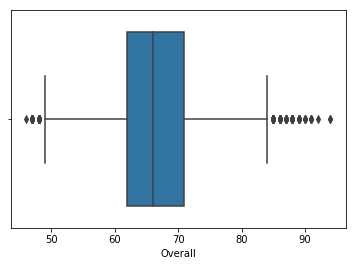

In [115]:
sns.boxplot(df1.Overall)
plt.savefig('Overall Boxplot.jpg')
plt.show()

In [1]:
overall=df1['Overall']
fig=plt.subplots(1,1,figsize=(10,10))
sns.kdeplot(overall, label="Overall Rating",shade=True,color='r')
plt.axvline(x=66.24,color='b')
plt.savefig('Overall Distribution.jpg')
plt.show()

NameError: name 'df1' is not defined

## 2.	Generate pair plots for the following variables:
## Overall, Value, Wage, International Reputation, Height, Weight, Release Clause


In [74]:
df2=df1[['Overall','Value (€)','Wage (€)','International Reputation','Height (cms)','Weight (lbs)','ReleaseClause (€)']]

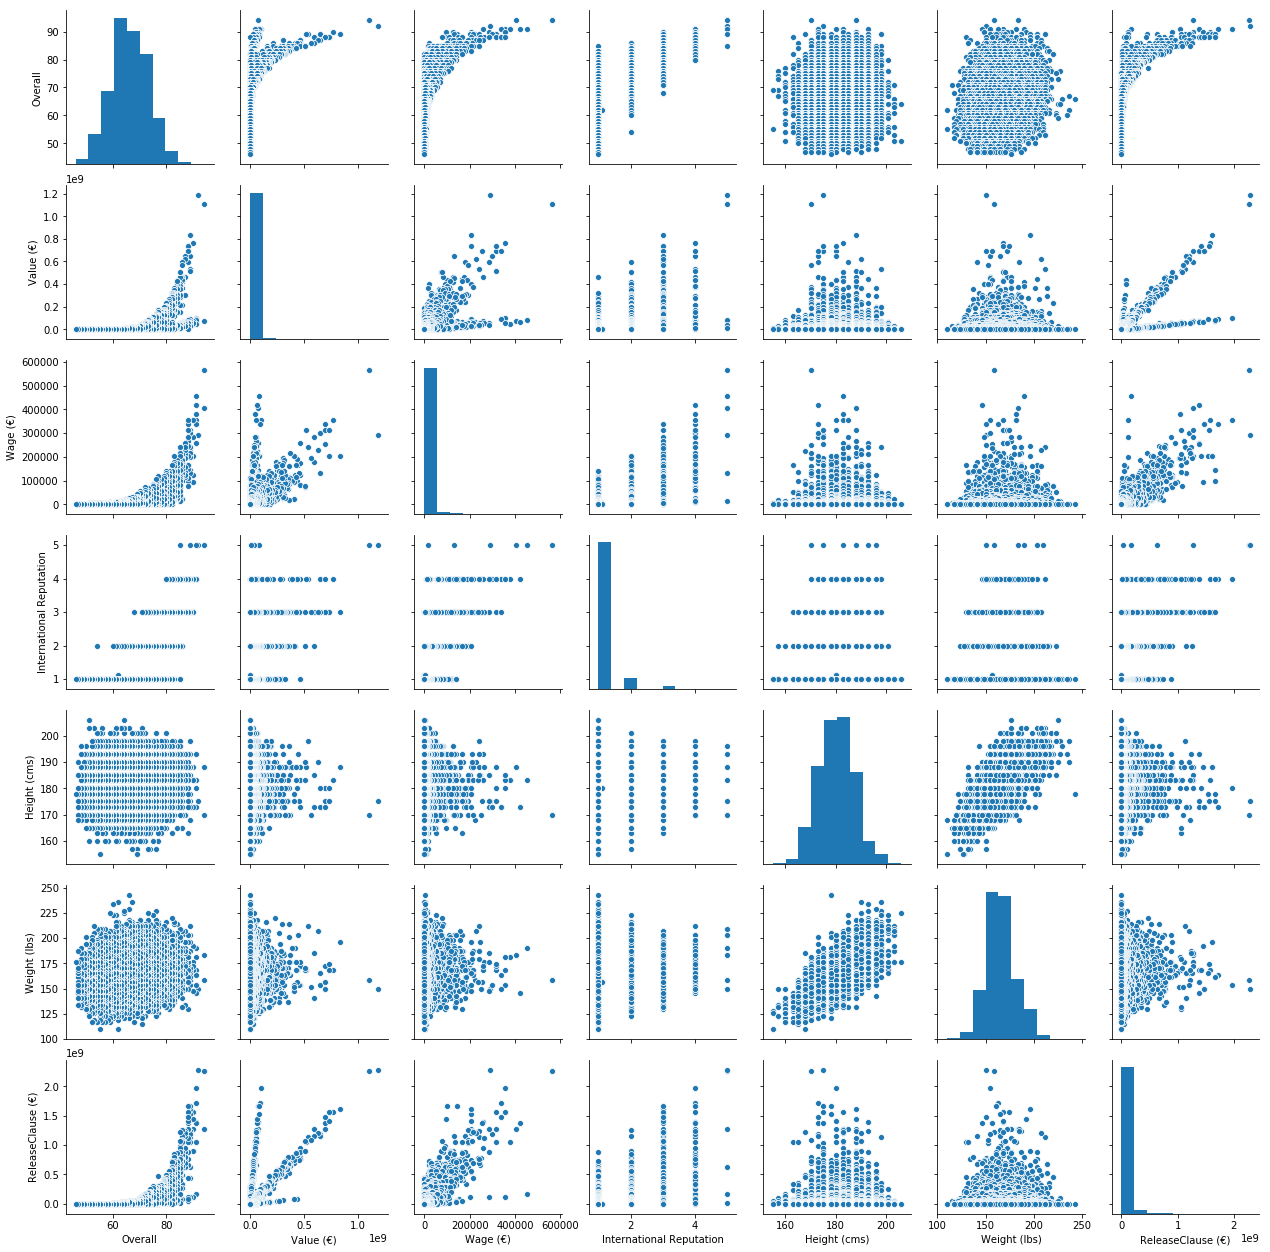

In [75]:
sns.pairplot(df2)
plt.savefig('Pair Plot.jpg')
plt.show()

## 3.	Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.

In [76]:
top=df1.loc[df1['Contract Valid Until']<=2020]
top['Overall']=top['Overall'].sort_values(ascending=False)
top20=top.head(20)
top20

,ID,Name,Age,Nationality,Overall,Potential,Value (€),Wage (€),Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause (€)
3,193080,De Gea,27,Spain,91,93,72000000.0,260000.0,Right,4.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,1.386000e+09
5,183277,E. Hazard,27,Belgium,91,91,93000000.0,340000.0,Right,4.0,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,1.721000e+09
6,177003,L. Modrić,32,Croatia,91,91,67000000.0,420000.0,Right,4.0,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,1.374000e+09
8,155862,Sergio Ramos,32,Spain,91,91,51000000.0,380000.0,Right,4.0,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,1.046000e+09
12,182493,D. Godín,32,Uruguay,90,90,44000000.0,125000.0,Right,3.0,...,82.0,90.0,89.0,89.0,6.0,8.0,15.0,5.0,15.0,9.020000e+08
13,168542,David Silva,32,Spain,90,90,60000000.0,285000.0,Left,4.0,...,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,1.110000e+08
21,179813,E. Cavani,31,Uruguay,89,89,60000000.0,200000.0,Right,4.0,...,82.0,52.0,45.0,39.0,12.0,5.0,13.0,13.0,10.0,1.110000e+08
24,138956,G. Chiellini,33,Italy,89,89,27000000.0,215000.0,Left,4.0,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,4.460000e+08
28,198710,J. Rodríguez,26,Colombia,88,89,695000000.0,315000.0,Left,4.0,...,87.0,52.0,41.0,44.0,15.0,15.0,15.0,5.0,14.0,1.264000e+09
31,190460,C. Eriksen,26,Denmark,88,91,735000000.0,205000.0,Right,3.0,...,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,1.415000e+09


In [116]:
export_excel4=top20.to_excel (r'C:\Users\Ajinkya\Desktop\DSE\Mini Project\EDA_Mini_Project\top20overall2020.xlsx')

### a) What would the average wage for this set of players be? 

In [117]:
print("Average Wage (€) for top 20 :",top20['Wage (€)'].mean())

Average Wage (€) for top 20 : 220100.0


### b)	What is the average age?

In [118]:
print("Average Age for top 20 :",top20['Age'].mean())

Average Age for top 20 : 30.45


### c)	Is there a correlation between the Overall rating and Value for these players?

In [120]:
corr_1=top20[['Overall','Value (€)']]
corr=corr_1.corr(method='pearson')
print(corr)

            Overall  Value (€)
Overall    1.000000  -0.277845
Value (€) -0.277845   1.000000


The value of negative correlation tells us that it is negligible correlation between overall rating and value of these players

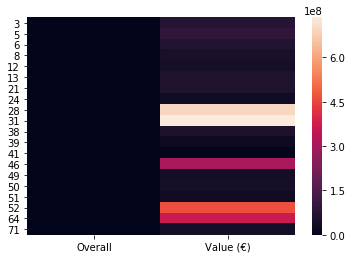

In [121]:
sns.heatmap(corr_1)
plt.savefig('Heat Map.jpg')
plt.show()

## 4.Generate tables containing the top 5 players by Overall rating for each unique position.



In [81]:
df1['Position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

In [82]:
rf=df1.loc[df1['Position']=='RF']
rf['Overall']=rf['Overall'].sort_values(ascending=False)
rf5=rf.head()
rf5

,ID,Name,Age,Nationality,Overall,Potential,Value (€),Wage (€),Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause (€)
0,158023,L. Messi,31,Argentina,94,94,1.105000e+09,565000.0,Left,5.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,2.265000e+09
50,175943,D. Mertens,31,Belgium,87,87,4.500000e+07,135000.0,Right,3.0,...,81.0,25.0,40.0,40.0,7.0,10.0,8.0,10.0,4.0,7.650000e+08
528,172114,D. Valeri,32,Argentina,80,80,1.150000e+08,12000.0,Right,2.0,...,83.0,39.0,40.0,30.0,15.0,15.0,8.0,10.0,12.0,1.730000e+08
890,150516,L. Podolski,33,Germany,78,78,6.500000e+07,11000.0,Left,3.0,...,79.0,54.0,39.0,39.0,10.0,9.0,16.0,9.0,9.0,8.100000e+07
1774,201313,C. Ciano,28,Italy,75,75,6.500000e+07,17000.0,Left,1.0,...,74.0,24.0,23.0,20.0,9.0,12.0,9.0,9.0,7.0,1.170000e+08


In [83]:
st=df1.loc[df1['Position']=='ST']
st['Overall']=st['Overall'].sort_values(ascending=False)
st5=st.head()
st5

,ID,Name,Age,Nationality,Overall,Potential,Value (€),Wage (€),Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause (€)
1,20801,Cristiano Ronaldo,33,Portugal,94,94,77000000.0,405000.0,Right,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,1.271000e+09
10,188545,R. Lewandowski,29,Poland,90,90,77000000.0,205000.0,Right,4.0,...,86.0,34.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,1.271000e+09
16,202126,H. Kane,24,England,89,91,835000000.0,205000.0,Right,3.0,...,89.0,56.0,36.0,38.0,8.0,10.0,11.0,14.0,11.0,1.607000e+09
23,153079,S. Agüero,30,Argentina,89,89,645000000.0,300000.0,Right,4.0,...,90.0,30.0,20.0,12.0,13.0,15.0,6.0,11.0,14.0,1.193000e+09
36,173731,G. Bale,28,Wales,88,88,60000000.0,355000.0,Left,4.0,...,86.0,54.0,55.0,52.0,15.0,15.0,11.0,5.0,6.0,1.230000e+08


In [84]:
lw=df1.loc[df1['Position']=='LW']
lw['Overall']=lw['Overall'].sort_values(ascending=False)
lw5=st.head()
lw5

,ID,Name,Age,Nationality,Overall,Potential,Value (€),Wage (€),Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause (€)
1,20801,Cristiano Ronaldo,33,Portugal,94,94,77000000.0,405000.0,Right,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,1.271000e+09
10,188545,R. Lewandowski,29,Poland,90,90,77000000.0,205000.0,Right,4.0,...,86.0,34.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,1.271000e+09
16,202126,H. Kane,24,England,89,91,835000000.0,205000.0,Right,3.0,...,89.0,56.0,36.0,38.0,8.0,10.0,11.0,14.0,11.0,1.607000e+09
23,153079,S. Agüero,30,Argentina,89,89,645000000.0,300000.0,Right,4.0,...,90.0,30.0,20.0,12.0,13.0,15.0,6.0,11.0,14.0,1.193000e+09
36,173731,G. Bale,28,Wales,88,88,60000000.0,355000.0,Left,4.0,...,86.0,54.0,55.0,52.0,15.0,15.0,11.0,5.0,6.0,1.230000e+08


In [85]:
gk=df1.loc[df1['Position']=='GK']
gk['Overall']=gk['Overall'].sort_values(ascending=False)
gk5=gk.head()
gk5

,ID,Name,Age,Nationality,Overall,Potential,Value (€),Wage (€),Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause (€)
3,193080,De Gea,27,Spain,91,93,72000000.0,260000.0,Right,4.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,1.386000e+09
9,200389,J. Oblak,25,Slovenia,90,93,68000000.0,94000.0,Right,3.0,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,1.445000e+09
18,192448,M. ter Stegen,26,Germany,89,92,58000000.0,240000.0,Right,3.0,...,69.0,25.0,13.0,10.0,87.0,85.0,88.0,85.0,90.0,1.233000e+09
19,192119,T. Courtois,26,Belgium,89,90,535000000.0,240000.0,Left,4.0,...,66.0,20.0,18.0,16.0,85.0,91.0,72.0,86.0,88.0,1.137000e+09
22,167495,M. Neuer,32,Germany,89,89,38000000.0,130000.0,Right,5.0,...,70.0,17.0,10.0,11.0,90.0,86.0,91.0,87.0,87.0,6.270000e+08


In [86]:
rcm=df1.loc[df1['Position']=='RCM']
rcm['Overall']=rcm['Overall'].sort_values(ascending=False)
rcm5=rcm.head()
rcm5

,ID,Name,Age,Nationality,Overall,Potential,Value (€),Wage (€),Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause (€)
4,192985,K. De Bruyne,27,Belgium,91,92,102000000.0,355000.0,Right,4.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,1.964000e+09
6,177003,L. Modrić,32,Croatia,91,91,67000000.0,420000.0,Right,4.0,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,1.374000e+09
53,168651,I. Rakitić,30,Croatia,87,87,465000000.0,260000.0,Right,4.0,...,81.0,72.0,74.0,70.0,14.0,11.0,12.0,5.0,9.0,9.530000e+08
82,212622,J. Kimmich,23,Germany,85,88,405000000.0,92000.0,Right,3.0,...,82.0,75.0,81.0,79.0,8.0,15.0,7.0,15.0,15.0,6.990000e+08
83,208421,Saúl,23,Spain,85,90,505000000.0,77000.0,Left,3.0,...,83.0,77.0,79.0,76.0,7.0,13.0,12.0,10.0,9.0,1.073000e+09


In [87]:
lf=df1.loc[df1['Position']=='LF']
lf['Overall']=lf['Overall'].sort_values(ascending=False)
lf5=lf.head()
lf5

,ID,Name,Age,Nationality,Overall,Potential,Value (€),Wage (€),Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause (€)
5,183277,E. Hazard,27,Belgium,91,91,93000000.0,340000.0,Right,4.0,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,1.721000e+09
15,211110,P. Dybala,24,Argentina,89,94,89000000.0,205000.0,Left,3.0,...,84.0,23.0,20.0,20.0,5.0,4.0,4.0,5.0,8.0,1.535000e+09
76,41,Iniesta,34,Spain,86,86,215000000.0,21000.0,Right,4.0,...,89.0,67.0,57.0,56.0,6.0,13.0,6.0,13.0,7.0,2.690000e+08
272,198164,Jonathan Viera,28,Spain,82,82,225000000.0,31000.0,Right,2.0,...,80.0,56.0,68.0,55.0,16.0,16.0,9.0,14.0,9.0,4.950000e+08
1379,190577,S. Blanco,30,Argentina,76,76,75000000.0,9000.0,Right,1.0,...,65.0,30.0,22.0,32.0,9.0,7.0,9.0,13.0,12.0,1.130000e+08


In [88]:
rs=df1.loc[df1['Position']=='RS']
rs['Overall']=rs['Overall'].sort_values(ascending=False)
rs5=rs.head()
rs5

,ID,Name,Age,Nationality,Overall,Potential,Value (€),Wage (€),Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause (€)
7,176580,L. Suárez,31,Uruguay,91,91,80000000.0,455000.0,Right,5.0,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,164000000.0
109,41236,Z. Ibrahimović,36,Sweden,85,85,14000000.0,15000.0,Right,5.0,...,90.0,28.0,37.0,24.0,13.0,15.0,10.0,9.0,12.0,21000000.0
148,167397,Falcao,32,Colombia,84,84,25000000.0,115000.0,Right,3.0,...,87.0,39.0,42.0,19.0,10.0,13.0,6.0,9.0,5.0,475000000.0
267,199451,W. Ben Yedder,27,France,82,82,235000000.0,28000.0,Right,2.0,...,84.0,34.0,33.0,26.0,6.0,13.0,9.0,7.0,7.0,494000000.0
357,202685,S. Zaza,27,Italy,81,82,21000000.0,48000.0,Left,2.0,...,72.0,54.0,42.0,50.0,7.0,13.0,9.0,7.0,9.0,306000000.0


In [89]:
lcm=df1.loc[df1['Position']=='LCM']
lcm['Overall']=lcm['Overall'].sort_values(ascending=False)
lcm5=lcm.head()
lcm5

,ID,Name,Age,Nationality,Overall,Potential,Value (€),Wage (€),Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause (€)
11,182521,T. Kroos,28,Germany,90,90,765000000.0,355000.0,Right,4.0,...,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,1.568000e+09
13,168542,David Silva,32,Spain,90,90,60000000.0,285000.0,Left,4.0,...,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,1.110000e+08
52,171877,M. Hamšík,30,Slovakia,87,87,465000000.0,125000.0,Right,3.0,...,84.0,75.0,73.0,62.0,8.0,6.0,4.0,14.0,14.0,7.910000e+08
63,199556,M. Verratti,25,Italy,86,89,55000000.0,135000.0,Right,3.0,...,93.0,78.0,83.0,80.0,12.0,12.0,15.0,15.0,10.0,1.059000e+09
114,212198,Bruno Fernandes,23,Portugal,84,88,405000000.0,22000.0,Right,2.0,...,83.0,63.0,66.0,53.0,12.0,14.0,15.0,8.0,14.0,8.400000e+07


In [90]:
cb=df1.loc[df1['Position']=='CB']
cb['Overall']=cb['Overall'].sort_values(ascending=False)
cb5=cb.head()
cb5

,ID,Name,Age,Nationality,Overall,Potential,Value (€),Wage (€),Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause (€)
12,182493,D. Godín,32,Uruguay,90,90,44000000.0,125000.0,Right,3.0,...,82.0,90.0,89.0,89.0,6.0,8.0,15.0,5.0,15.0,9.020000e+08
42,205600,S. Umtiti,24,France,87,92,57000000.0,205000.0,Left,3.0,...,82.0,90.0,89.0,86.0,15.0,10.0,14.0,12.0,15.0,1.211000e+09
73,177509,M. Benatia,31,Morocco,86,86,30000000.0,160000.0,Right,3.0,...,82.0,89.0,87.0,85.0,7.0,4.0,8.0,7.0,11.0,4.950000e+08
89,192366,N. Otamendi,30,Argentina,85,85,285000000.0,170000.0,Right,3.0,...,80.0,83.0,85.0,84.0,12.0,5.0,8.0,11.0,12.0,5.270000e+08
102,171919,Naldo,35,Brazil,85,85,9000000.0,38000.0,Right,3.0,...,84.0,86.0,88.0,85.0,14.0,10.0,14.0,8.0,14.0,1.530000e+08


In [91]:
ldm=df1.loc[df1['Position']=='LDM']
ldm['Overall']=ldm['Overall'].sort_values(ascending=False)
ldm5=ldm.head()
ldm5

,ID,Name,Age,Nationality,Overall,Potential,Value (€),Wage (€),Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause (€)
14,215914,N. Kanté,27,France,89,90,63000000.0,225000.0,Right,3.0,...,85.0,90.0,91.0,85.0,15.0,12.0,10.0,7.0,10.0,1.213000e+09
91,187961,Paulinho,29,Brazil,85,85,37000000.0,235000.0,Right,3.0,...,80.0,75.0,81.0,73.0,16.0,16.0,11.0,6.0,8.0,7.770000e+08
119,207865,Marquinhos,24,Brazil,84,89,355000000.0,90000.0,Right,3.0,...,79.0,85.0,87.0,87.0,6.0,6.0,12.0,10.0,13.0,6.830000e+08
217,176266,Lucas Leiva,31,Brazil,83,83,175000000.0,64000.0,Right,3.0,...,86.0,82.0,82.0,78.0,10.0,8.0,8.0,5.0,6.0,2.980000e+08
323,228702,F. de Jong,21,Netherlands,81,89,26000000.0,19000.0,Right,1.0,...,86.0,69.0,73.0,70.0,7.0,13.0,10.0,10.0,9.0,4.160000e+08


In [92]:
cam=df1.loc[df1['Position']=='CAM']
cam['Overall']=cam['Overall'].sort_values(ascending=False)
cam5=cam.head()
cam5

,ID,Name,Age,Nationality,Overall,Potential,Value (€),Wage (€),Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause (€)
17,194765,A. Griezmann,27,France,89,90,78000000.0,145000.0,Left,4.0,...,87.0,59.0,47.0,48.0,14.0,8.0,14.0,13.0,14.0,1.658000e+09
31,190460,C. Eriksen,26,Denmark,88,91,735000000.0,205000.0,Right,3.0,...,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,1.415000e+09
61,201942,Roberto Firmino,26,Brazil,86,87,53000000.0,195000.0,Right,3.0,...,87.0,60.0,64.0,42.0,8.0,11.0,9.0,6.0,10.0,1.047000e+09
66,189596,T. Müller,28,Germany,86,86,45000000.0,135000.0,Right,4.0,...,83.0,44.0,41.0,44.0,6.0,7.0,11.0,14.0,14.0,7.430000e+08
74,176635,M. Özil,29,Germany,86,86,435000000.0,190000.0,Left,4.0,...,82.0,24.0,16.0,19.0,6.0,14.0,10.0,6.0,14.0,8.270000e+08


In [93]:
cdm=df1.loc[df1['Position']=='CDM']
cdm['Overall']=cdm['Overall'].sort_values(ascending=False)
cdm5=cdm.head()
cdm5

,ID,Name,Age,Nationality,Overall,Potential,Value (€),Wage (€),Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause (€)
20,189511,Sergio Busquets,29,Spain,89,89,515000000.0,315000.0,Right,4.0,...,90.0,90.0,86.0,80.0,5.0,8.0,13.0,9.0,13.0,1.056000e+09
27,200145,Casemiro,26,Brazil,88,90,595000000.0,285000.0,Right,3.0,...,84.0,88.0,90.0,87.0,13.0,14.0,16.0,12.0,12.0,1.264000e+09
72,180206,M. Pjanić,28,Bosnia Herzegovina,86,86,44000000.0,180000.0,Right,3.0,...,86.0,75.0,74.0,70.0,7.0,7.0,13.0,7.0,8.0,7.260000e+08
75,135507,Fernandinho,33,Brazil,86,86,18000000.0,185000.0,Right,3.0,...,79.0,85.0,85.0,80.0,12.0,11.0,5.0,13.0,7.0,3.330000e+08
118,209499,Fabinho,24,Brazil,84,88,34000000.0,120000.0,Right,3.0,...,84.0,83.0,86.0,84.0,13.0,12.0,6.0,8.0,8.0,6.720000e+08


In [94]:
ls=df1.loc[df1['Position']=='LS']
ls['Overall']=ls['Overall'].sort_values(ascending=False)
ls5=ls.head()
ls5

,ID,Name,Age,Nationality,Overall,Potential,Value (€),Wage (€),Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause (€)
21,179813,E. Cavani,31,Uruguay,89,89,60000000.0,200000.0,Right,4.0,...,82.0,52.0,45.0,39.0,12.0,5.0,13.0,13.0,10.0,111000000.0
38,167664,G. Higuaín,30,Argentina,88,88,57000000.0,245000.0,Right,4.0,...,86.0,35.0,22.0,18.0,5.0,12.0,7.0,5.0,10.0,666000000.0
100,179844,Diego Costa,29,Spain,85,85,385000000.0,100000.0,Right,4.0,...,83.0,58.0,39.0,34.0,11.0,13.0,12.0,8.0,11.0,789000000.0
151,143076,A. Gómez,30,Argentina,84,84,30000000.0,53000.0,Right,3.0,...,84.0,50.0,30.0,34.0,8.0,11.0,12.0,9.0,6.0,51000000.0
174,208093,Gerard Moreno,26,Spain,83,85,32000000.0,53000.0,Left,1.0,...,72.0,43.0,41.0,41.0,15.0,12.0,7.0,12.0,10.0,696000000.0


In [95]:
lcb=df1.loc[df1['Position']=='LCB']
lcb['Overall']=lcb['Overall'].sort_values(ascending=False)
lcb5=lcb.head()
lcb5

,ID,Name,Age,Nationality,Overall,Potential,Value (€),Wage (€),Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause (€)
24,138956,G. Chiellini,33,Italy,89,89,27000000.0,215000.0,Left,4.0,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,446000000.0
34,178603,M. Hummels,29,Germany,88,88,46000000.0,160000.0,Right,4.0,...,91.0,88.0,90.0,88.0,15.0,6.0,10.0,5.0,6.0,759000000.0
44,201024,K. Koulibaly,27,Senegal,87,90,51000000.0,115000.0,Right,3.0,...,78.0,91.0,88.0,86.0,7.0,11.0,7.0,13.0,5.0,905000000.0
51,172871,J. Vertonghen,31,Belgium,87,87,34000000.0,155000.0,Left,3.0,...,83.0,90.0,87.0,88.0,6.0,10.0,9.0,12.0,7.0,629000000.0
59,203376,V. van Dijk,26,Netherlands,86,88,445000000.0,165000.0,Right,3.0,...,83.0,88.0,89.0,84.0,13.0,10.0,13.0,11.0,11.0,879000000.0


In [96]:
rm=df1.loc[df1['Position']=='RM']
rm['Overall']=rm['Overall'].sort_values(ascending=False)
rm5=rm.head()
rm5

,ID,Name,Age,Nationality,Overall,Potential,Value (€),Wage (€),Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause (€)
25,231747,K. Mbappé,19,France,88,95,81000000.0,100000.0,Right,3.0,...,86.0,34.0,34.0,32.0,13.0,5.0,7.0,11.0,6.0,1.661000e+09
26,209331,M. Salah,26,Egypt,88,89,695000000.0,255000.0,Left,3.0,...,91.0,38.0,43.0,41.0,14.0,14.0,9.0,11.0,14.0,1.373000e+09
122,204970,F. Thauvin,25,France,84,87,39000000.0,72000.0,Left,2.0,...,82.0,46.0,29.0,31.0,8.0,11.0,14.0,10.0,9.0,7.700000e+07
137,185020,José Callejón,31,Spain,84,84,275000000.0,105000.0,Right,3.0,...,79.0,64.0,32.0,32.0,8.0,5.0,14.0,11.0,11.0,4.680000e+08
138,183898,A. Di María,30,Argentina,84,84,295000000.0,125000.0,Left,4.0,...,82.0,35.0,59.0,56.0,10.0,7.0,11.0,12.0,11.0,5.460000e+08


In [97]:
lam=df1.loc[df1['Position']=='LAM']
lam['Overall']=lam['Overall'].sort_values(ascending=False)
lam5=lam.head()
lam5

,ID,Name,Age,Nationality,Overall,Potential,Value (€),Wage (€),Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause (€)
28,198710,J. Rodríguez,26,Colombia,88,89,695000000.0,315000.0,Left,4.0,...,87.0,52.0,41.0,44.0,15.0,15.0,15.0,5.0,14.0,1.264000e+09
365,199434,D. Tadić,29,Serbia,81,81,175000000.0,26000.0,Left,3.0,...,82.0,46.0,34.0,26.0,11.0,11.0,14.0,9.0,16.0,2.450000e+08
1587,230408,Fabrio Farinha,26,Brazil,75,75,7000000.0,31000.0,Left,1.0,...,76.0,23.0,56.0,48.0,8.0,15.0,11.0,7.0,15.0,1.330000e+08
2247,230487,Leo Caldeirinha,34,Brazil,74,74,28000000.0,13000.0,Left,1.0,...,76.0,25.0,24.0,22.0,18.0,16.0,13.0,15.0,15.0,5.400000e+07
2342,230276,Nicolás Formido,30,Brazil,74,74,55000000.0,23000.0,Left,1.0,...,72.0,18.0,29.0,21.0,9.0,8.0,8.0,7.0,12.0,1.050000e+08


In [98]:
lm=df1.loc[df1['Position']=='LM']
lm['Overall']=lm['Overall'].sort_values(ascending=False)
lm5=lm.head()
lm5

,ID,Name,Age,Nationality,Overall,Potential,Value (€),Wage (€),Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause (€)
33,188567,P. Aubameyang,29,Gabon,88,88,59000000.0,265000.0,Right,3.0,...,86.0,27.0,25.0,36.0,6.0,9.0,15.0,9.0,9.0,1.121000e+09
58,208722,S. Mané,26,Senegal,86,87,52000000.0,195000.0,Right,3.0,...,80.0,42.0,42.0,38.0,10.0,10.0,15.0,7.0,14.0,1.027000e+09
65,190483,Douglas Costa,27,Brazil,86,86,465000000.0,175000.0,Left,3.0,...,84.0,45.0,38.0,34.0,13.0,15.0,9.0,12.0,5.0,7.670000e+08
68,188350,M. Reus,29,Germany,86,86,435000000.0,100000.0,Right,4.0,...,84.0,47.0,36.0,45.0,12.0,12.0,13.0,13.0,11.0,7.400000e+07
86,193747,Koke,26,Spain,85,86,45000000.0,88000.0,Right,3.0,...,78.0,80.0,69.0,51.0,14.0,12.0,5.0,10.0,13.0,9.560000e+08


In [99]:
lb=df1.loc[df1['Position']=='LB']
lb['Overall']=lb['Overall'].sort_values(ascending=False)
lb5=lb.head()
lb5

,ID,Name,Age,Nationality,Overall,Potential,Value (€),Wage (€),Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause (€)
35,176676,Marcelo,30,Brazil,88,88,43000000.0,285000.0,Left,4.0,...,86.0,71.0,85.0,86.0,12.0,5.0,5.0,5.0,9.0,882000000.0
49,189332,Jordi Alba,29,Spain,87,87,38000000.0,250000.0,Left,3.0,...,79.0,72.0,84.0,85.0,13.0,15.0,13.0,6.0,13.0,779000000.0
64,191043,Alex Sandro,27,Brazil,86,86,365000000.0,160000.0,Left,3.0,...,82.0,81.0,84.0,84.0,7.0,7.0,9.0,12.0,5.0,602000000.0
85,197445,D. Alaba,26,Austria,85,87,38000000.0,110000.0,Left,4.0,...,79.0,80.0,82.0,80.0,5.0,7.0,14.0,15.0,9.0,656000000.0
106,164169,Filipe Luís,32,Brazil,85,85,215000000.0,81000.0,Left,3.0,...,88.0,78.0,84.0,86.0,11.0,15.0,9.0,9.0,5.0,441000000.0


In [100]:
rdm=df1.loc[df1['Position']=='RDM']
rdm['Overall']=rdm['Overall'].sort_values(ascending=False)
rdm5=rdm.head()
rdm5

,ID,Name,Age,Nationality,Overall,Potential,Value (€),Wage (€),Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause (€)
45,195864,P. Pogba,25,France,87,91,64000000.0,210000.0,Right,4.0,...,87.0,66.0,70.0,68.0,5.0,6.0,2.0,4.0,3.0,1.232000e+09
134,190584,Illarramendi,28,Spain,84,84,31000000.0,51000.0,Right,2.0,...,79.0,69.0,83.0,80.0,15.0,7.0,11.0,14.0,12.0,6.510000e+08
198,193474,I. Gueye,28,Senegal,83,83,21000000.0,125000.0,Right,2.0,...,80.0,84.0,89.0,84.0,8.0,6.0,8.0,12.0,13.0,3.990000e+08
223,53302,D. De Rossi,34,Italy,83,83,8000000.0,80000.0,Right,3.0,...,87.0,90.0,82.0,80.0,10.0,7.0,13.0,10.0,9.0,1.360000e+08
298,183498,M. Parolo,33,Italy,82,82,9000000.0,59000.0,Right,2.0,...,78.0,78.0,80.0,82.0,13.0,9.0,6.0,7.0,9.0,1.530000e+08


In [101]:
rw=df1.loc[df1['Position']=='RW']
rw['Overall']=rw['Overall'].sort_values(ascending=False)
rw5=rw.head()
rw5

,ID,Name,Age,Nationality,Overall,Potential,Value (€),Wage (€),Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause (€)
56,218667,Bernardo Silva,23,Portugal,86,91,595000000.0,180000.0,Left,2.0,...,85.0,49.0,44.0,35.0,9.0,10.0,14.0,12.0,9.0,1.145000e+09
60,202652,R. Sterling,23,England,86,89,565000000.0,195000.0,Right,3.0,...,77.0,47.0,58.0,54.0,15.0,12.0,12.0,15.0,9.0,1.088000e+09
79,220834,Marco Asensio,22,Spain,85,92,54000000.0,215000.0,Left,3.0,...,83.0,40.0,42.0,39.0,13.0,9.0,6.0,12.0,10.0,1.215000e+09
84,204485,R. Mahrez,27,Algeria,85,85,405000000.0,205000.0,Left,3.0,...,86.0,45.0,31.0,18.0,15.0,9.0,13.0,11.0,6.0,7.490000e+08
93,184941,A. Sánchez,29,Chile,85,85,375000000.0,215000.0,Right,4.0,...,84.0,38.0,44.0,35.0,10.0,10.0,15.0,12.0,13.0,6.940000e+08


In [102]:
cm=df1.loc[df1['Position']=='CM']
cm['Overall']=cm['Overall'].sort_values(ascending=False)
cm5=cm.head()
cm5

,ID,Name,Age,Nationality,Overall,Potential,Value (€),Wage (€),Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause (€)
67,189509,Thiago,27,Spain,86,86,455000000.0,130000.0,Right,3.0,...,85.0,67.0,63.0,65.0,6.0,11.0,7.0,9.0,13.0,751000000.0
78,223848,S. Milinković-Savić,23,Serbia,85,90,505000000.0,73000.0,Right,2.0,...,82.0,75.0,77.0,72.0,7.0,10.0,7.0,16.0,7.0,896000000.0
121,205498,Jorginho,26,Italy,84,87,38000000.0,155000.0,Right,2.0,...,79.0,63.0,78.0,70.0,14.0,7.0,13.0,14.0,8.0,732000000.0
136,186942,I. Gündoğan,27,Germany,84,84,32000000.0,175000.0,Right,3.0,...,87.0,73.0,68.0,64.0,11.0,14.0,5.0,5.0,13.0,592000000.0
161,220971,N. Keïta,23,Guinea,83,88,34000000.0,120000.0,Right,2.0,...,79.0,68.0,62.0,61.0,7.0,14.0,15.0,14.0,9.0,672000000.0


In [103]:
rb=df1.loc[df1['Position']=='RB']
rb['Overall']=rb['Overall'].sort_values(ascending=False)
rb5=rb.head()
rb5

,ID,Name,Age,Nationality,Overall,Potential,Value (€),Wage (€),Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause (€)
69,184432,Azpilicueta,28,Spain,86,86,35000000.0,175000.0,Right,3.0,...,78.0,88.0,90.0,86.0,13.0,9.0,10.0,6.0,5.0,648000000.0
123,204963,Carvajal,26,Spain,84,87,315000000.0,185000.0,Right,3.0,...,77.0,83.0,83.0,85.0,13.0,13.0,15.0,9.0,15.0,669000000.0
135,188377,K. Walker,28,England,84,84,245000000.0,165000.0,Right,3.0,...,75.0,78.0,84.0,83.0,12.0,6.0,16.0,15.0,8.0,453000000.0
192,199564,Sergi Roberto,26,Spain,83,86,265000000.0,170000.0,Right,3.0,...,76.0,75.0,83.0,83.0,14.0,16.0,11.0,15.0,10.0,563000000.0
216,177457,L. Bender,29,Germany,83,83,20000000.0,82000.0,Right,3.0,...,83.0,88.0,86.0,82.0,12.0,6.0,7.0,12.0,7.0,34000000.0


In [104]:
ram=df1.loc[df1['Position']=='RAM']
ram['Overall']=ram['Overall'].sort_values(ascending=False)
ram5=ram.head()
ram5

,ID,Name,Age,Nationality,Overall,Potential,Value (€),Wage (€),Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause (€)
129,193082,J. Cuadrado,30,Colombia,84,84,295000000.0,150000.0,Right,3.0,...,80.0,63.0,70.0,74.0,5.0,5.0,13.0,6.0,9.0,487000000.0
171,208670,H. Ziyech,25,Morocco,83,86,325000000.0,28000.0,Left,3.0,...,83.0,52.0,66.0,36.0,11.0,7.0,11.0,8.0,14.0,479000000.0
1705,230465,Allan Bardinho,26,Brazil,75,75,7000000.0,22000.0,Left,1.0,...,71.0,23.0,33.0,32.0,12.0,8.0,17.0,8.0,15.0,133000000.0
2242,230483,Jacson Zonta,34,Brazil,74,74,28000000.0,13000.0,Right,1.0,...,66.0,31.0,21.0,22.0,8.0,14.0,9.0,9.0,12.0,54000000.0
2322,230267,Sebas Couteira,30,Brazil,74,74,55000000.0,14000.0,Right,1.0,...,71.0,32.0,52.0,41.0,15.0,13.0,12.0,10.0,9.0,105000000.0


In [105]:
cf=df1.loc[df1['Position']=='CF']
cf['Overall']=cf['Overall'].sort_values(ascending=False)
cf5=cf.head()
cf5

,ID,Name,Age,Nationality,Overall,Potential,Value (€),Wage (€),Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause (€)
271,198706,Luis Alberto,25,Spain,82,85,285000000.0,67000.0,Right,2.0,...,72.0,44.0,25.0,18.0,6.0,8.0,6.0,12.0,11.0,506000000.0
293,184431,S. Giovinco,31,Italy,82,82,20000000.0,15000.0,Right,2.0,...,82.0,23.0,29.0,28.0,6.0,3.0,6.0,3.0,3.0,30000000.0
350,205175,A. Milik,24,Poland,81,88,255000000.0,71000.0,Left,3.0,...,72.0,35.0,34.0,32.0,9.0,16.0,16.0,15.0,6.0,485000000.0
382,187072,L. Stindl,29,Germany,81,81,18000000.0,43000.0,Right,2.0,...,83.0,59.0,61.0,50.0,7.0,10.0,13.0,11.0,12.0,306000000.0
407,144622,Raffael,33,Brazil,81,81,11000000.0,41000.0,Right,2.0,...,79.0,43.0,42.0,31.0,12.0,10.0,5.0,13.0,14.0,187000000.0


In [106]:
rwb=df1.loc[df1['Position']=='RWB']
rwb['Overall']=rwb['Overall'].sort_values(ascending=False)
rwb5=rwb.head()
rwb5

,ID,Name,Age,Nationality,Overall,Potential,Value (€),Wage (€),Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause (€)
450,207862,M. Ginter,24,Germany,80,82,155000000.0,28000.0,Right,2.0,...,71.0,82.0,84.0,77.0,12.0,10.0,6.0,8.0,10.0,275000000.0
465,203605,P. Kadeřábek,26,Czech Republic,80,81,14000000.0,39000.0,Right,2.0,...,78.0,72.0,79.0,76.0,10.0,11.0,14.0,13.0,7.0,249000000.0
517,180216,S. Coleman,29,Republic of Ireland,80,80,11000000.0,97000.0,Right,2.0,...,82.0,78.0,84.0,82.0,5.0,15.0,10.0,13.0,7.0,209000000.0
652,197083,D. Caligiuri,30,Italy,79,79,9000000.0,33000.0,Right,2.0,...,76.0,70.0,72.0,68.0,12.0,10.0,13.0,6.0,14.0,153000000.0
766,221342,Pablo Maffeo,20,Spain,78,86,13000000.0,24000.0,Right,1.0,...,62.0,76.0,81.0,80.0,10.0,7.0,14.0,12.0,15.0,247000000.0


In [107]:
lwb=df1.loc[df1['Position']=='LWB']
lwb['Overall']=lwb['Overall'].sort_values(ascending=False)
lwb5=lwb.head()
lwb5

,ID,Name,Age,Nationality,Overall,Potential,Value (€),Wage (€),Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause (€)
474,200536,N. Schulz,25,Germany,80,81,145000000.0,37000.0,Left,1.0,...,75.0,74.0,76.0,77.0,13.0,9.0,15.0,7.0,14.0,257000000.0
581,223682,Granell,29,Spain,79,79,12000000.0,37000.0,Left,1.0,...,69.0,55.0,75.0,65.0,6.0,13.0,13.0,14.0,14.0,252000000.0
601,210455,Jonny,24,Spain,79,83,135000000.0,43000.0,Right,2.0,...,70.0,77.0,79.0,82.0,7.0,10.0,12.0,10.0,6.0,244000000.0
605,208334,J. Hector,28,Germany,79,79,10000000.0,26000.0,Left,3.0,...,78.0,76.0,79.0,79.0,9.0,10.0,10.0,12.0,14.0,15000000.0
787,214026,J. Mojica,25,Colombia,78,81,105000000.0,28000.0,Left,1.0,...,69.0,67.0,78.0,79.0,13.0,8.0,14.0,9.0,15.0,228000000.0


In [108]:
rcb=df1.loc[df1['Position']=='RCB']
rcb['Overall']=rcb['Overall'].sort_values(ascending=False)
rcb5=rcb.head()
rcb5

,ID,Name,Age,Nationality,Overall,Potential,Value (€),Wage (€),Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause (€)
8,155862,Sergio Ramos,32,Spain,91,91,51000000.0,380000.0,Right,4.0,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,1.046000e+09
39,164240,Thiago Silva,33,Brazil,88,88,24000000.0,165000.0,Right,4.0,...,81.0,88.0,89.0,85.0,9.0,12.0,5.0,9.0,10.0,4.440000e+08
54,152729,Piqué,31,Spain,87,87,34000000.0,240000.0,Right,4.0,...,86.0,91.0,86.0,84.0,10.0,11.0,14.0,15.0,8.0,6.970000e+08
62,201535,R. Varane,25,France,86,91,50000000.0,210000.0,Right,3.0,...,82.0,87.0,88.0,87.0,11.0,11.0,9.0,5.0,14.0,1.063000e+09
70,184344,L. Bonucci,31,Italy,86,86,30000000.0,160000.0,Right,3.0,...,86.0,90.0,86.0,80.0,2.0,2.0,3.0,2.0,4.0,4.950000e+08


### a) Are there any players appearing in more than one Table. Please point out such players.

In [109]:
dup=pd.DataFrame([rf5['Name'].values,
st5['Name'].values,
lw5['Name'].values,
gk5['Name'].values,
rcm5['Name'].values,
lf5['Name'].values,
rs5['Name'].values,
rcb5['Name'].values,
lcm5['Name'].values,
cb5['Name'].values,
ldm5['Name'].values,
cam5['Name'].values,
cdm5['Name'].values,
ls5['Name'].values,
lcb5['Name'].values,
rm5['Name'].values,
lam5['Name'].values,
lm5['Name'].values,
lb5['Name'].values,
rdm5['Name'].values,
rw5['Name'].values,
cm5['Name'].values,
rb5['Name'].values,
ram5['Name'].values,
cf5['Name'].values,
rwb5['Name'].values,
lwb5['Name'].values])
dup[dup.duplicated(keep='first')]

,0,1,2,3,4
2,Cristiano Ronaldo,R. Lewandowski,H. Kane,S. Agüero,G. Bale


### b) What is the average wage one can expect to pay for the top 5 in every position?

In [110]:
df1['Position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

In [111]:
print("Average Wage (€) for Position RF : ",rf5['Wage (€)'].mean())
print("Average Wage (€) for Position ST : ",st5['Wage (€)'].mean())
print("Average Wage (€) for Position LW : ",lw5['Wage (€)'].mean())
print("Average Wage (€) for Position GK : ",gk5['Wage (€)'].mean())
print("Average Wage (€) for Position RCM : ",rcm5['Wage (€)'].mean())
print("Average Wage (€) for Position LF : ",lf5['Wage (€)'].mean())
print("Average Wage (€) for Position RS : ",rs5['Wage (€)'].mean())
print("Average Wage (€) for Position RCB : ",rcb5['Wage (€)'].mean())
print("Average Wage (€) for Position LCM : ",lcm5['Wage (€)'].mean())
print("Average Wage (€) for Position CB : ",cb5['Wage (€)'].mean())
print("Average Wage (€) for Position LDM : ",ldm5['Wage (€)'].mean())
print("Average Wage (€) for Position CAM : ",cam5['Wage (€)'].mean())
print("Average Wage (€) for Position CDM : ",cdm5['Wage (€)'].mean())
print("Average Wage (€) for Position LS : ",ls5['Wage (€)'].mean())
print("Average Wage (€) for Position LCB : ",lcb5['Wage (€)'].mean())
print("Average Wage (€) for Position RM : ",rm5['Wage (€)'].mean())
print("Average Wage (€) for Position LAM : ",lam5['Wage (€)'].mean())
print("Average Wage (€) for Position LM : ",lm5['Wage (€)'].mean())
print("Average Wage (€) for Position LB : ",lb5['Wage (€)'].mean())
print("Average Wage (€) for Position RDM : ",rdm5['Wage (€)'].mean())
print("Average Wage (€) for Position RW : ",rw5['Wage (€)'].mean())
print("Average Wage (€) for Position CM : ",cm5['Wage (€)'].mean())
print("Average Wage (€) for Position RB : ",rb5['Wage (€)'].mean())
print("Average Wage (€) for Position RAM : ",ram5['Wage (€)'].mean())
print("Average Wage (€) for Position CF : ",cf5['Wage (€)'].mean())
print("Average Wage (€) for Position RWB : ",rwb5['Wage (€)'].mean())
print("Average Wage (€) for Position LWB : ",lwb5['Wage (€)'].mean())

Average Wage (€) for Position RF :  148000.0
Average Wage (€) for Position ST :  294000.0
Average Wage (€) for Position LW :  294000.0
Average Wage (€) for Position GK :  192800.0
Average Wage (€) for Position RCM :  240800.0
Average Wage (€) for Position LF :  121200.0
Average Wage (€) for Position RS :  132200.0
Average Wage (€) for Position RCB :  231000.0
Average Wage (€) for Position LCM :  184400.0
Average Wage (€) for Position CB :  139600.0
Average Wage (€) for Position LDM :  126600.0
Average Wage (€) for Position CAM :  174000.0
Average Wage (€) for Position CDM :  217000.0
Average Wage (€) for Position LS :  130200.0
Average Wage (€) for Position LCB :  162000.0
Average Wage (€) for Position RM :  131400.0
Average Wage (€) for Position LAM :  81600.0
Average Wage (€) for Position LM :  164600.0
Average Wage (€) for Position LB :  177200.0
Average Wage (€) for Position RDM :  105000.0
Average Wage (€) for Position RW :  202000.0
Average Wage (€) for Position CM :  130600.0
Av